In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
print(train_data.isnull().sum().sum())

0


In [7]:
print(train_data.value_counts().sum())

42000


In [3]:
X = train_data.iloc[:, 1:].values
Y = train_data.iloc[:, 0].values

In [4]:
X = X/255.0

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
# original - basic version - around 97% (0.9733) accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8484 - loss: 0.4998
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9678 - loss: 0.1050
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9763 - loss: 0.0733
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9828 - loss: 0.0516
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9882 - loss: 0.0350
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9888 - loss: 0.0323
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9909 - loss: 0.0277
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9928 - loss: 0.0209
Epoch 9/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9931 - loss: 0.0234
Epoch 10/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9929 - loss: 0.0204
Epoch 11/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9941 - loss: 0.0175
Epoch 12/100
1

In [52]:
Y_prob = model.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [53]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[806   0   1   0   0   1   5   1   0   2]
 [  0 901   2   0   1   0   1   1   3   0]
 [  3   3 821   2   4   0   3   2   2   6]
 [  2   0   1 907   0  11   0   1   8   7]
 [  2   0   0   0 819   0   9   1   1   7]
 [  1   0   0   7   0 684   6   1   0   3]
 [  4   1   0   0   0   1 779   0   0   0]
 [  1   2   8   2   2   1   0 858   2  17]
 [  1   2   1   5   4   7   5   0 802   8]
 [  2   0   0   6  21   2   0   3   3 801]]
Accuracy: 0.9736


Model Refinement and Performance Trade-off

After building a baseline Artificial Neural Network (ANN) model, I achieved a strong validation accuracy of 97.99%. This initial version had no regularization, relying purely on dense layers with ReLU activations.

To improve model generalization and prevent overfitting, I experimented with several techniques commonly used in deep learning workflows:


Modifications Introduced:

Dropout (0.3) - Randomly disables 30% of neurons during training - Reduces overfitting but may slightly reduce learning capacity

BatchNormalization - Normalizes activations between layers, Stabilizes and speeds up training but can slightly shift data distribution

EarlyStopping - Stops training when validation loss stops improving, Avoids over-training but may halt before model fully converges











In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(784, )))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss= sparse_categorical_crossentropy, metrics=['accuracy'])

ES = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

In [55]:
history2= model.fit(X_train, Y_train, batch_size=32, epochs=150, validation_split=0.2, callbacks=[ES])

Epoch 1/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7167 - loss: 0.9092 - val_accuracy: 0.9439 - val_loss: 0.1855
Epoch 2/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9021 - loss: 0.3156 - val_accuracy: 0.9574 - val_loss: 0.1456
Epoch 3/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9276 - loss: 0.2492 - val_accuracy: 0.9601 - val_loss: 0.1410
Epoch 4/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9366 - loss: 0.2128 - val_accuracy: 0.9653 - val_loss: 0.1173
Epoch 5/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9420 - loss: 0.1953 - val_accuracy: 0.9649 - val_loss: 0.1227
Epoch 6/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9482 - loss: 0.1731 - val_accuracy: 0.9692 - val_loss: 0.1080
Epoch 7/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9519 - loss: 0.1539 - val_accuracy: 0.9693 - val_loss: 0.1128
Epoch 8/150
840/840 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9563 - loss: 0.1492 - val_

In [56]:
Y_prob = model.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


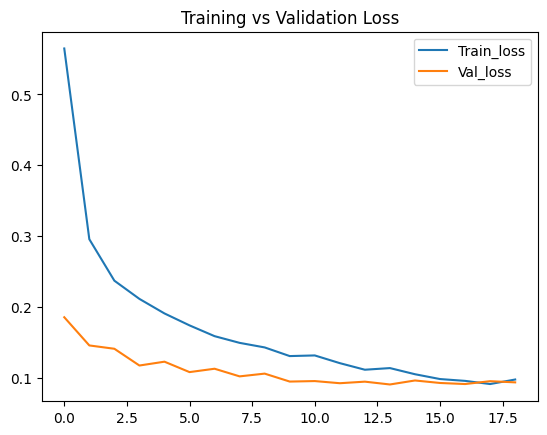

In [57]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Train_loss')
plt.plot(history2.history['val_loss'], label='Val_loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

The graphs are to see if the model architecture was sound and it was working as expected

**Training and Validation Loss **- Loss reduction across both training and validation sets is smooth and parallel, indicating effective learning and minimal overfitting.

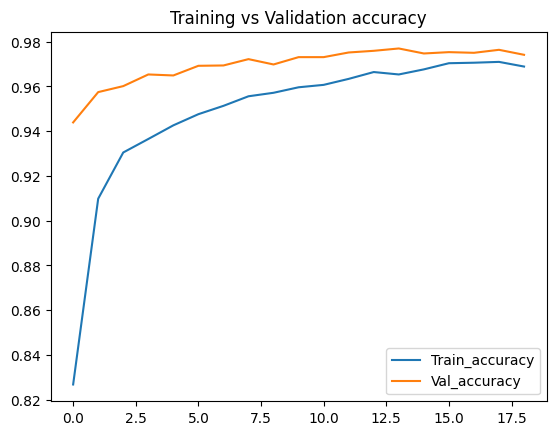

In [58]:
plt.plot(history2.history['accuracy'], label='Train_accuracy')
plt.plot(history2.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation accuracy")
plt.show()

**Training vs Validation Accuracy**

This chart demonstrates consistent improvement and convergence between training and validation accuracy, indicating the model generalized well without overfitting

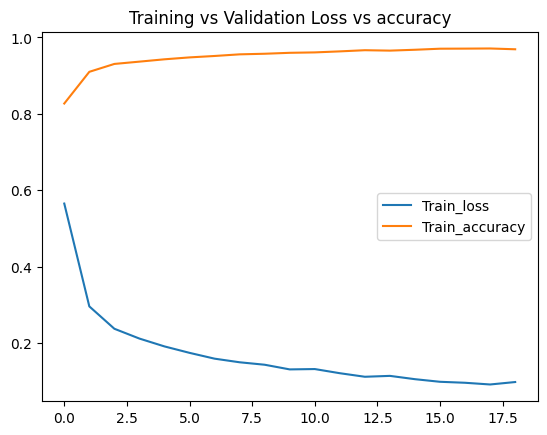

In [59]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Train_loss')
plt.plot(history2.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

This plot illustrates the inverse relationship between loss and accuracy. As the model learns, the drop in loss directly contributes to accuracy gains.

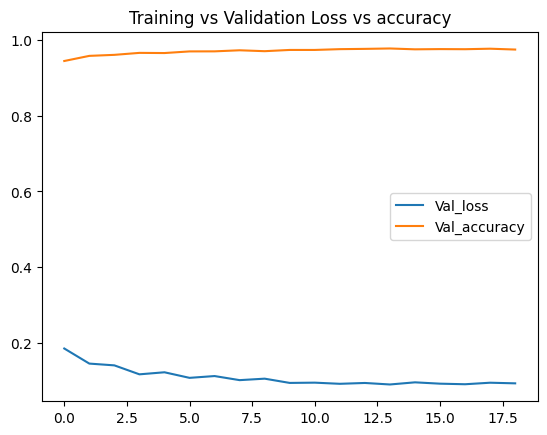

In [60]:
import matplotlib.pyplot as plt
plt.plot(history2.history['val_loss'], label='Val_loss')
plt.plot(history2.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

Despite the flattening of validation loss, accuracy remains high, suggesting strong generalization and minimal overfitting.

In [61]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[801   0   1   1   0   4   4   1   4   0]
 [  0 900   2   0   1   2   1   1   1   1]
 [  1   7 815   5   5   0   2   4   7   0]
 [  0   0   2 899   0  14   1   6  11   4]
 [  1   0   0   0 814   1   8   2   1  12]
 [  0   1   0   9   1 685   4   0   1   1]
 [  2   0   0   0   0   6 775   0   2   0]
 [  0   3   3   2   2   1   0 873   1   8]
 [  1   4   2   5   2   8   8   2 800   3]
 [  0   0   1   6  13   2   0   8   3 805]]
Accuracy: 0.9723


After implementing these changes, the model’s accuracy became 97.58%, slightly lower than the baseline. However, this version is better regularized, and less prone to memorizing noise or overfitting the training data.

**Why the Accuracy Dropped?**

The original dataset (MNIST) is clean and balanced — so the simpler model performs very well.

Adding regularization intentionally restricts the model’s complexity, improving generalization but reducing its ability to memorize.

This trade-off is expected and acceptable — especially for real-world scenarios.

**What This Demonstrates:**

I approached model design iteratively — first establishing a strong baseline, then enhancing robustness by introducing regularization. Even though accuracy dipped slightly, this version is better suited for real-world deployment, where data may be noisy or unpredictable.

**NEXT STEPS**

I wanted to tune the hyper paramerts a bit and add L2 regularization, change the Activation Function, reduce teh dropout , increase teh patience on early stopping to demonstrate how I would use each of those to view the changes it had on teh model and see which one fits the best if the model did not do well as expected with unseen prod data

L2 Regularization - Penalizes overly large weights to reduce overfitting.

Tanh Activation - Smooth, zero-centered; works well with normalized input.

Smaller Dropout - Retains more learning while still regularizing.

EarlyStopping - Prevents overtraining if validation loss stops improving.

Larger Batch Size (64) - Speeds up training and smooths gradient updates.








In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import regularizers

model = Sequential()

# Layer 1: Increased to 512 units, 'tanh' activation, L2 regularization
model.add(Dense(512, activation='tanh', input_shape=(784,), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))  # Reduced dropout to prevent underfitting

# Layer 2
model.add(Dense(256, activation='tanh',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

# Layer 3
model.add(Dense(128, activation='tanh',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

# Layer 4
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(10, activation='softmax'))  # Multi-class classification

# Compile
model.compile(optimizer=Adam(learning_rate=0.0005),loss=sparse_categorical_crossentropy,metrics=['accuracy'])

# Early stopping
ES = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Summary before training
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history3 = model.fit(X_train, Y_train, batch_size=64, epochs=150, validation_split=0.2, callbacks=[ES])

Epoch 1/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7778 - loss: 1.7349 - val_accuracy: 0.9199 - val_loss: 0.9786
Epoch 2/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9045 - loss: 0.9679 - val_accuracy: 0.9259 - val_loss: 0.7506
Epoch 3/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9183 - loss: 0.7520 - val_accuracy: 0.9385 - val_loss: 0.5962
Epoch 4/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9268 - loss: 0.6109 - val_accuracy: 0.9338 - val_loss: 0.5337
Epoch 5/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9319 - loss: 0.5237 - val_accuracy: 0.9448 - val_loss: 0.4540
Epoch 6/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9354 - loss: 0.4659 - val_accuracy: 0.9472 - val_loss: 0.4103
Epoch 7/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9396 - loss: 0.4268 - val_accuracy: 0.9449 - val_loss: 0.3949
Epoch 8/150
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9389 - loss: 0.40

In [64]:
Y_prob = model.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [65]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[803   0   2   0   0   5   1   0   4   1]
 [  0 889   4   0   1   2   1   5   7   0]
 [  4   8 804   2  11   0   1   5  11   0]
 [  1   3   7 874   0  12   0  11  21   8]
 [  2   0   3   0 802   1   6   1   0  24]
 [  2   1   2   8   1 680   2   1   3   2]
 [ 13   1   2   0   4  10 749   0   6   0]
 [  0   2   4   3   8   1   0 861   2  12]
 [  2   1   4   6   3   6   1   1 810   1]
 [  5   1   0   8   4   5   0  19  11 785]]
Accuracy: 0.9592


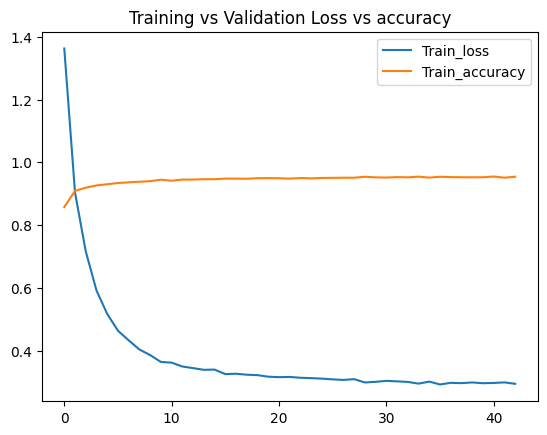

In [69]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Train_loss')
plt.plot(history3.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

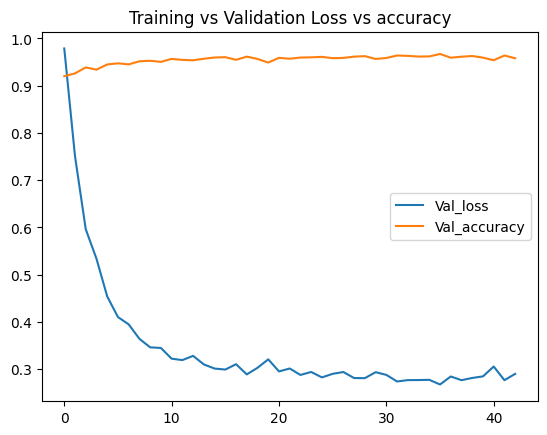

In [70]:
import matplotlib.pyplot as plt
plt.plot(history3.history['val_loss'], label='Val_loss')
plt.plot(history3.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

**Why the Accuracy Dropped in the Advanced Model**

After building a simpler baseline neural network that achieved high accuracy (~97.9%), I experimented with more advanced techniques such as:
	•	Adding more hidden layers
	•	Increasing the number of neurons
	•	Switching to 'tanh' activation
	•	Applying L2 regularization
	•	Reducing dropout rate
	•	Using a larger batch size

Despite the model being deeper and more regularized, the final validation accuracy slightly decreased (~95.9%). This is a natural and explainable outcome in deep learning, especially during experimentation.

**Why This Is Still Valuable**
	•	More complexity ≠ better performance: The original model had a simple structure that already fit the data well. By increasing regularization and depth, the model became more cautious and less flexible, which can slightly lower performance on well-behaved data like MNIST digits.
	•	Regularization’s role: L2 regularization penalizes large weights to prevent overfitting, which may hurt performance if the original model wasn’t overfitting in the first place.
	•	‘tanh’ vs ‘relu’: While tanh can be useful in some contexts, relu is usually preferred in deeper models for its simplicity and gradient stability.
	•	Portfolio > Performance: The goal here isn’t just to get the highest accuracy — it’s to demonstrate understanding, experiment with architecture, and show the ability to debug and explain results.

**Takeaway**

This experiment demonstrates that I understand:
	•	Model architecture design
	•	Trade-offs of deeper networks
	•	How regularization and activation functions affect learning
	•	That sometimes simpler models generalize better


APPLYING CNN to process the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Reshape your data to (num_samples, 28, 28, 1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,858 (1.77 MB)

 Trainable params: 462,858 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history4 = model.fit(X_train_cnn, Y_train, batch_size=64, epochs=30, validation_split=0.2, callbacks=[early_stop])

Epoch 1/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.8018 - loss: 0.6340 - val_accuracy: 0.9762 - val_loss: 0.0850
Epoch 2/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9781 - loss: 0.0697 - val_accuracy: 0.9841 - val_loss: 0.0577
Epoch 3/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9855 - loss: 0.0451 - val_accuracy: 0.9847 - val_loss: 0.0593
Epoch 4/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9887 - loss: 0.0334 - val_accuracy: 0.9853 - val_loss: 0.0528
Epoch 5/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9887 - val_loss: 0.0463
Epoch 6/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9869 - val_loss: 0.0528
Epoch 7/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9943 - loss: 0.0168 - val_accuracy: 0.9862 - val_loss: 0.0629
Epoch 8/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9959 - loss: 0.0130 - 

In [13]:
Y_prob = model.predict(X_test.reshape(-1,28,28,1))
Y_pred = Y_prob.argmax(axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [14]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[805   0   0   1   0   0   8   0   0   2]
 [  0 907   0   0   0   0   1   1   0   0]
 [  0   1 839   2   2   0   0   1   1   0]
 [  0   0   0 925   0   5   0   3   3   1]
 [  0   0   0   0 828   0   6   1   1   3]
 [  0   0   0   3   0 690   5   0   2   2]
 [  0   0   0   0   0   0 783   0   2   0]
 [  0   3   1   0   0   0   0 886   1   2]
 [  1   1   1   1   1   1   1   1 826   1]
 [  1   1   0   0   1   2   0   3   2 828]]
Accuracy: 0.9901


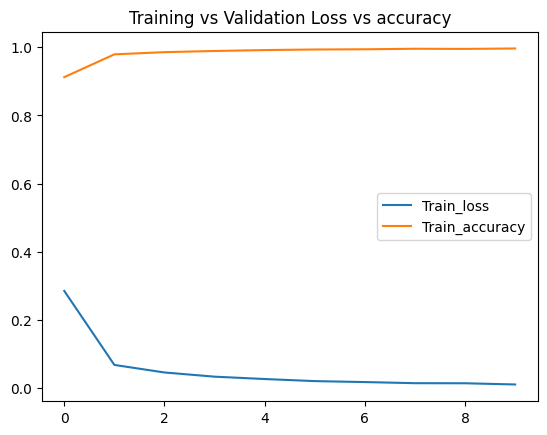

In [15]:
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'], label='Train_loss')
plt.plot(history4.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

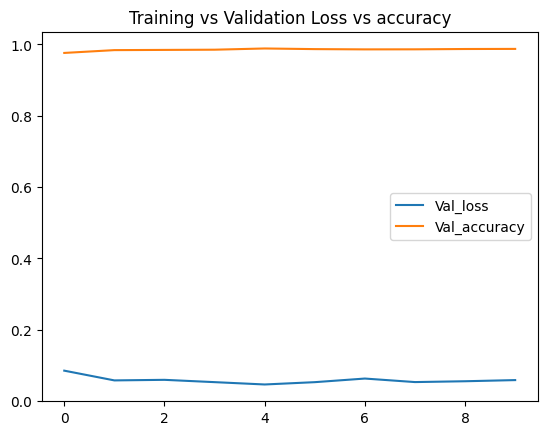

In [16]:
import matplotlib.pyplot as plt
plt.plot(history4.history['val_loss'], label='Val_loss')
plt.plot(history4.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()